In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# Import regression model csv
# multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/merged_internet_access.csv")
# multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/scaled_merged_internet_access.csv")
multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/practice_scaled_merged_internet_access.csv")
# round to two decimal places in python pandas 
pd.options.display.float_format = '{:.2f}'.format
multiple_linear_regression_df.head()

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,0.88,0.50,0.50,0.20,0.80,0.03,0.01,...,0.12,0.05,0.05,0.05,0.11,0.10,0.13,0.08,0.28,0.02
1,0500000US06043-Mariposa County,17540,2.13,0.41,0.51,0.49,0.11,0.89,0.02,0.01,...,0.09,0.04,0.05,0.05,0.11,0.09,0.13,0.09,0.34,0.02
2,0500000US06115-Yuba County,75493,2.83,0.76,0.51,0.49,0.28,0.72,0.01,0.07,...,0.16,0.08,0.07,0.07,0.16,0.12,0.11,0.06,0.16,0.01
3,0500000US06013-Contra Costa County,1133247,2.86,0.98,0.49,0.51,0.25,0.75,0.00,0.16,...,0.12,0.07,0.06,0.06,0.13,0.13,0.14,0.07,0.19,0.02
4,0500000US06035-Lassen County,31185,2.23,0.52,0.66,0.34,0.19,0.81,0.03,0.01,...,0.09,0.05,0.05,0.10,0.20,0.14,0.13,0.06,0.18,0.01


In [3]:
# Seperate the features and target
y = multiple_linear_regression_df['level_up_access_pop_percent']
multiple_linear_regression_df.drop(['ID', 'population'], axis = 1, inplace = True)
# dropping rows to improve regression model, 18% of rows with >= (-).70 which tell: inverse rows, rows that were "total pop" rows, columns that are similar to other rows
# 1st attempt (overfitted) multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'occupation_population_16_and_over_total', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'family_structure_hh_total'], axis = 1, inplace = True)
# added race not hispanic, two and three or more (covered by other columns), occupation columns (similar to industry and income), hh computer(s) (similar to other columns), hh w/comp(similar to w/internet), with income total (similar to income columns), median income(mean similar and more accurate), family structure total (similiar to similar columns),  employment 16+ (similar to other columns), employment rate(similar to unemployed column) disability <18, 18-64, 65+ (similar to population and age data), 64+ w/disability (similar to 65+ age column), citizenships columns(similar/inverse of race columns)
multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'race_two_or_more_excluding_some_ther_and_three_or_more', 'race_two_or_more_including_some_other', 'occupation_population_16_and_over_total', 'occupation_management_business_science_and_arts', 'occupation_service', 'occupation_sales_and_office', 'occupation_natural_resources_construction_and_maintenance', 'occupation_production_transporation_and_material_moving', 'hh_with_computer', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'hh_median_income', 'family_structure_hh_total', 'disability_population_under_18', 'disability_population_18-64', 'disability_population_65_and_over', 'disability_64_and_over_with_disability', 'employment_16_and_over_in_labor_force', 'employment_%_unemployment_rate', 'citizenship_native_born', 'citizenship_foreign_born'], axis = 1, inplace = True)
# testing columns: sex( inverse), mean (similar to 150K+ income column), industry columns (similar to income)
multiple_linear_regression_df.drop(['industry_agriculture_forestry_fishing_and_hunting_and_mining', 'industry_construction', 'industry_manufacturing', 'industry_wholesale_trade', 'industry_retail_trade', 'industry_transportation_and_warehousing_and_utilities', 'industry_information', 'industry_finance_and_insurance_real_estate_and_rental_and_leasing', 'industry_professional_scientific_management_administrative_and_waste_management_services', 'industry_educational_services_health_care_and_social_assistance', 'industry_arts_entertainment_recreation_accommodation_and_food_services', 'industry_other_services_except_public_administration', 'industry_public_administration'], axis = 1, inplace = True)

In [4]:
y

0    0.88
1    0.41
2    0.76
3    0.98
4    0.52
5    0.93
6    0.95
7    0.85
8    0.83
9    0.99
10   0.96
11   0.92
12   0.89
13   0.02
14   0.98
15   0.87
16   0.95
17   0.12
18   0.84
19   0.99
20   0.99
21   0.97
22   0.99
23   0.94
24   0.68
25   0.76
26   0.94
27   0.65
28   0.88
29   0.12
30   0.89
31   0.90
32   0.99
33   0.81
34   0.91
35   1.00
36   0.99
37   0.91
38   0.33
39   0.80
40   0.16
41   0.83
42   0.93
43   0.49
44   0.89
45   0.75
46   1.00
47   0.80
48   0.71
49   0.75
50   0.23
51   0.95
52   0.87
53   0.92
54   0.40
55   0.77
56   0.85
57   0.98
Name: level_up_access_pop_percent, dtype: float64

In [5]:
multiple_linear_regression_df.drop(['level_up_access_pop_percent'], axis = 1, inplace = True)
x = multiple_linear_regression_df
x

,avg_household_size,sex_total_men,sex_total_women,race_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,2.43,0.50,0.50,0.20,0.03,0.01,0.02,0.00,0.00,0.02,...,0.12,0.05,0.05,0.05,0.11,0.10,0.13,0.08,0.28,0.02
1,2.13,0.51,0.49,0.11,0.02,0.01,0.01,0.00,0.00,0.04,...,0.09,0.04,0.05,0.05,0.11,0.09,0.13,0.09,0.34,0.02
2,2.83,0.51,0.49,0.28,0.01,0.07,0.03,0.00,0.00,0.05,...,0.16,0.08,0.07,0.07,0.16,0.12,0.11,0.06,0.16,0.01
3,2.86,0.49,0.51,0.25,0.00,0.16,0.08,0.00,0.00,0.05,...,0.12,0.07,0.06,0.06,0.13,0.13,0.14,0.07,0.19,0.02
4,2.23,0.66,0.34,0.19,0.03,0.01,0.09,0.01,0.00,0.02,...,0.09,0.05,0.05,0.10,0.20,0.14,0.13,0.06,0.18,0.01
5,2.92,0.50,0.50,0.45,0.00,0.05,0.02,0.00,0.00,0.02,...,0.13,0.06,0.08,0.11,0.13,0.11,0.11,0.06,0.18,0.02
6,2.60,0.49,0.51,0.27,0.00,0.04,0.01,0.00,0.00,0.03,...,0.11,0.06,0.06,0.06,0.13,0.12,0.13,0.07,0.23,0.02
7,3.87,0.51,0.49,0.84,0.01,0.01,0.02,0.00,0.00,0.01,...,0.16,0.08,0.08,0.08,0.15,0.12,0.11,0.05,0.16,0.02
8,2.86,0.52,0.48,0.27,0.02,0.02,0.00,0.00,0.01,0.02,...,0.09,0.06,0.04,0.09,0.16,0.11,0.14,0.09,0.20,0.01
9,2.81,0.49,0.51,0.22,0.00,0.29,0.10,0.01,0.00,0.04,...,0.12,0.06,0.06,0.06,0.17,0.15,0.14,0.06,0.17,0.02


In [6]:
corr_df = multiple_linear_regression_df.corr()
# corr_df.to_csv("../resources/regression_ml_model/correlation_table.csv")
# corr_df.to_csv("../resources/regression_ml_model/scaled_correlation_table.csv")
# corr_df.to_csv("../resources/regression_ml_model/correlation_practice_table.csv")
corr_df.to_csv("../resources/regression_ml_model/correlation_2ndpractice_table.csv")
corr_df.head()

,avg_household_size,sex_total_men,sex_total_women,race_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
avg_household_size,1.00,-0.15,0.15,0.81,0.03,0.16,0.21,-0.05,-0.13,-0.19,...,0.68,0.82,0.70,0.38,0.28,0.41,-0.16,-0.55,-0.68,-0.52
sex_total_men,-0.15,1.00,-1.00,-0.08,0.23,-0.22,0.14,0.02,-0.22,-0.21,...,-0.24,-0.16,-0.21,0.10,0.25,0.13,-0.21,0.02,0.04,-0.11
sex_total_women,0.15,-1.00,1.00,0.08,-0.23,0.22,-0.14,-0.02,0.22,0.21,...,0.24,0.16,0.21,-0.10,-0.25,-0.13,0.21,-0.02,-0.04,0.11
race_hispanic_or_latino,0.81,-0.08,0.08,1.00,-0.30,0.01,0.18,-0.11,-0.11,-0.48,...,0.82,0.79,0.57,0.40,0.40,0.33,-0.05,-0.54,-0.76,-0.61
race_american_indian_and_alaska_native,0.03,0.23,-0.23,-0.30,1.00,-0.27,-0.21,-0.16,-0.15,0.12,...,-0.28,-0.11,0.18,-0.16,-0.30,-0.15,-0.53,0.04,0.38,0.36


In [7]:
# Define the multiple linear regression model
model = LinearRegression().fit(x,y)

In [8]:
# Fit the model
model

LinearRegression()

In [9]:
# predict with the data
y_pred = model.predict(x)
y_pred1 =pd.DataFrame(y_pred, columns =['Estimated Access %'])
y_pred1.head()

,Estimated Access %
0,0.89
1,0.36
2,0.84
3,1.01
4,0.49


In [10]:
y_test = pd.DataFrame(y)
y_test = y_test.reset_index(drop=True)
y_test.head()

,level_up_access_pop_percent
0,0.88
1,0.41
2,0.76
3,0.98
4,0.52


In [11]:
ynew = pd.concat([y_test, y_pred1], axis=1)
ynew.head()

,level_up_access_pop_percent,Estimated Access %
0,0.88,0.89
1,0.41,0.36
2,0.76,0.84
3,0.98,1.01
4,0.52,0.49


In [12]:
model.score(x,y)

0.9516237993790293

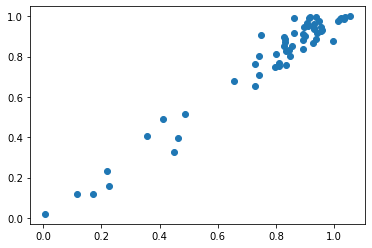

In [13]:
# Visualize Regression
residuals = (y - y_pred)
plt.scatter(y_pred, y)
plt.show()

In [59]:
# Calculate feature importance in the Random Forest model.
importance = model.coef_
importance

array([-8.74738873e-03,  6.68388113e-01, -6.68388158e-01,  8.38020747e-01,
        6.91669438e-01, -9.08131234e-01, -1.33040400e+00,  3.36596260e+00,
       -9.22083778e+00,  6.69303765e+00, -1.29317421e-01,  1.39965239e+00,
        2.53057885e+01,  3.54664053e-01, -3.65732112e+01,  6.31191276e+00,
        1.13199014e+01, -2.03221067e+00, -1.52733382e+01,  1.31747111e+00,
        9.01742347e+00, -1.47293418e-05,  2.45936175e+00, -2.71096067e+00,
        6.43695096e+00,  1.33321946e+00,  2.83570611e+00, -1.65721199e-01,
       -1.05243935e-01, -1.11019101e-01, -1.66885400e-01, -1.03508756e-01,
       -1.30027026e-01,  2.14128891e+01,  1.91207753e+00,  4.71398075e+00,
       -7.51408774e+00, -1.06674775e+01, -9.01650760e-01, -2.69815915e+00,
       -9.50184320e+00,  2.23024792e+00,  6.31818170e+00, -5.08353255e+00,
        2.31043406e+01])

Feature: 0, Score: -0.00875
Feature: 1, Score: 0.66839
Feature: 2, Score: -0.66839
Feature: 3, Score: 0.83802
Feature: 4, Score: 0.69167
Feature: 5, Score: -0.90813
Feature: 6, Score: -1.33040
Feature: 7, Score: 3.36596
Feature: 8, Score: -9.22084
Feature: 9, Score: 6.69304
Feature: 10, Score: -0.12932
Feature: 11, Score: 1.39965
Feature: 12, Score: 25.30579
Feature: 13, Score: 0.35466
Feature: 14, Score: -36.57321
Feature: 15, Score: 6.31191
Feature: 16, Score: 11.31990
Feature: 17, Score: -2.03221
Feature: 18, Score: -15.27334
Feature: 19, Score: 1.31747
Feature: 20, Score: 9.01742
Feature: 21, Score: -0.00001
Feature: 22, Score: 2.45936
Feature: 23, Score: -2.71096
Feature: 24, Score: 6.43695
Feature: 25, Score: 1.33322
Feature: 26, Score: 2.83571
Feature: 27, Score: -0.16572
Feature: 28, Score: -0.10524
Feature: 29, Score: -0.11102
Feature: 30, Score: -0.16689
Feature: 31, Score: -0.10351
Feature: 32, Score: -0.13003
Feature: 33, Score: 21.41289
Feature: 34, Score: 1.91208
Feature:

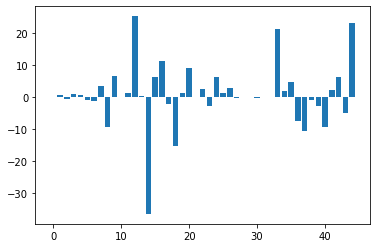

In [60]:
# summarize feature importance
for i,v in enumerate(importance):
#   sorted(zip(model.coef_, x.columns), reverse=True)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [55]:
# We can sort the features by their importance.
importance = sorted(zip(model.coef_, x.columns), reverse=True)
importance

[(25.30578847668766, 'hh_with_income_less_than_10000'),
 (23.104340566231784, 'age_85_and_over'),
 (21.412889127370903, 'disability_under_18_with_disability'),
 (11.319901410676497, 'hh_with_income_35000-49999'),
 (9.01742346756685, 'hh_with_income_150000_and_greater'),
 (6.693037654696342, 'race_two_or_more'),
 (6.43695095504955, 'employment_employed'),
 (6.318181703671684, 'age_55-59'),
 (6.3119127611098, 'hh_with_income_25000-34999'),
 (4.7139807452650935, 'age_under_9'),
 (3.3659625958654407, 'race_native_hawaiian_and_other_pacific_islander'),
 (2.8357061142333584, 'employment_not_in_labor_force'),
 (2.45936175136323, 'family_structure_hh_with_one_or_more_under_18'),
 (2.2302479227189322, 'age_45-54'),
 (1.9120775334824904, 'disability_18-64_with_disability'),
 (1.399652386688968, 'hh_with_bb_internet_subscription'),
 (1.33321946265892, 'employment_unemployed'),
 (1.317471108170953, 'hh_with_income_100000-149999'),
 (0.8380207473297038, 'race_hispanic_or_latino'),
 (0.6916694378609

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 45 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   avg_household_size                                          58 non-null     float64
 1   sex_total_men                                               58 non-null     float64
 2   sex_total_women                                             58 non-null     float64
 3   race_hispanic_or_latino                                     58 non-null     float64
 4   race_american_indian_and_alaska_native                      58 non-null     float64
 5   race_asian                                                  58 non-null     float64
 6   race_black_or_african_american                              58 non-null     float64
 7   race_native_hawaiian_and_other_pacific_islander             58 non-null     float64
 8   ra

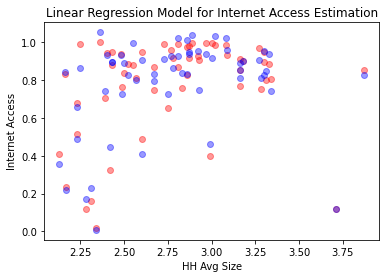

In [16]:
plt.scatter(x['avg_household_size'], y_test, color='red', alpha=0.4)
plt.scatter(x['avg_household_size'], y_pred, color='blue', alpha=0.4)
plt.xlabel('HH Avg Size')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

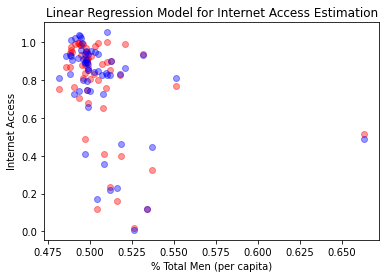

In [17]:
plt.scatter(x['sex_total_men'], y_test, color='red', alpha=0.4)
plt.scatter(x['sex_total_men'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Total Men (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

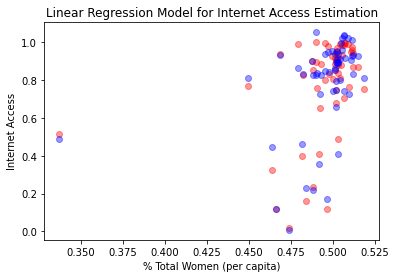

In [18]:
plt.scatter(x['sex_total_women'], y_test, color='red', alpha=0.4)
plt.scatter(x['sex_total_women'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Total Women (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

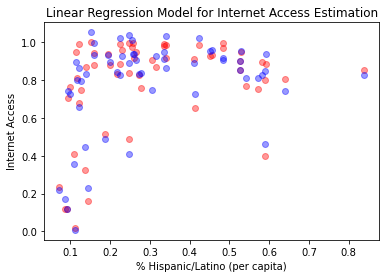

In [19]:
plt.scatter(x['race_hispanic_or_latino'], y_test, color='red', alpha=0.4)
plt.scatter(x['race_hispanic_or_latino'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Hispanic/Latino (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

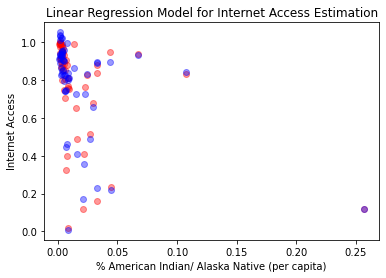

In [20]:
plt.scatter(x['race_american_indian_and_alaska_native'], y_test, color='red', alpha=0.4)
plt.scatter(x['race_american_indian_and_alaska_native'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% American Indian/ Alaska Native (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

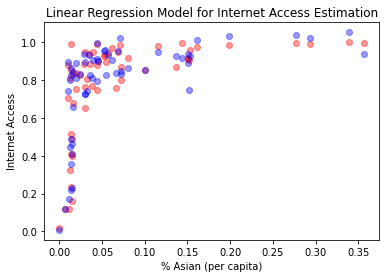

In [21]:
plt.scatter(x['race_asian'], y_test, color='red', alpha=0.4)
plt.scatter(x['race_asian'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Asian (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');